In [ ]:
# Experimenting with Hierarchical Clustering (Dendrogram)

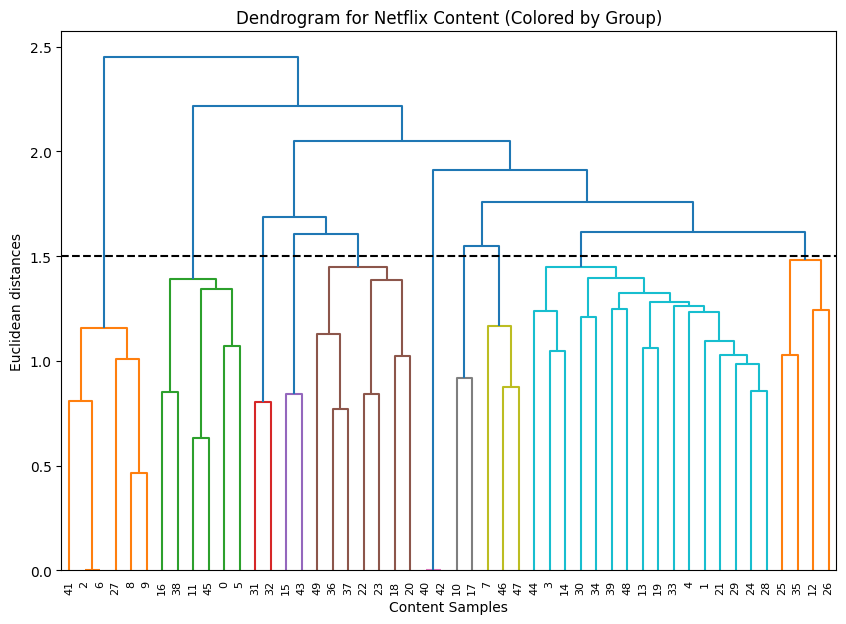

In [6]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Load the matrix we saved earlier
X = np.load('matrix_reduced.npy')

# Adjust the 'color_threshold' to match your 'K=6' logic
# You usually set this to a value on the Y-axis where 6 vertical lines exist
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Netflix Content (Colored by Group)")

# 'color_threshold' defines where the colors split
dendrogram = sch.dendrogram(
    sch.linkage(X[:50], method='ward'),
    color_threshold=1.5  # Adjust this number to change where colors split
)

plt.axhline(y=1.5, color='black', linestyle='--') # The "Cut" line
plt.xlabel('Content Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# 1. LOAD DATA (This fixes the NameError)
# We need to reload 'df' so the notebook knows what it is
try:
    df = pd.read_csv('processed_netflix_data.csv')
    X = np.load('matrix_reduced.npy')
    print("Data and Matrix loaded successfully.")
except FileNotFoundError:
    print("Error: Files not found. Ensure you ran the previous steps!")

# 2. Run the clustering on our sample (matching the Dendrogram)
hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
sample_clusters = hc.fit_predict(X[:50]) 

# 3. Create the temporary DataFrame for these 50 movies
sample_df = df.iloc[:50].copy()
sample_df['cluster_id'] = sample_clusters

# 4. Print the titles in each group to identify the "Color Themes"
print("\n--- Dendrogram Group Breakdown ---")
for cluster_num in range(6):
    group_titles = sample_df[sample_df['cluster_id'] == cluster_num]['title'].tolist()
    if group_titles: # Only print if the group isn't empty
        print(f"\nGroup {cluster_num}:")
        print(f"Titles: {group_titles}")

Data and Matrix loaded successfully.

--- Dendrogram Group Breakdown ---

Group 0:
Titles: ['Oct-01', '15-Aug', '\u200b\u200bKuch Bheege Alfaaz', '\u200bMaj Rati \u200b\u200bKeteki', '\u200bMayurakshi', '#FriendButMarried', '#FriendButMarried 2', '#Selfie', '#Selfie 69', 'Òlòtūré', '10 jours en or']

Group 1:
Titles: ['7:19', '9', '21', '1994', '2,215', '3022', "'89", '\u200bGoli Soda 2', '\u200bSAINT SEIYA: Knights of the Zodiac', '(T)ERROR', '(Un)Well', '#AnneFrank - Parallel Stories', '#blackAF', '#cats_the_mewvie', '#realityhigh', '#Roxy', '#Rucker50', '¡Ay, mi madre!', 'Æon Flux', '10 Days in Sun City']

Group 2:
Titles: ['187', '1922', '22-Jul', '1 Chance 2 Dance', '1 Mile to You']

Group 3:
Titles: ['23:59', '122', '706', '1920', '#Alive', 'Ég man þig']

Group 4:
Titles: ['Çarsi Pazar', 'Çok Filim Hareketler Bunlar']

Group 5:
Titles: ['3%', '46', '1983', 'Feb-09', 'แผนร้ายนายเจ้าเล่ห์', 'Şubat']


In [ ]:
#base code
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Load the matrix we saved earlier
X = np.load('matrix_reduced.npy')

# To make the Dendrogram readable for a beginner project, we use a sample of 50 rows
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Netflix Content")
dendrogram = sch.dendrogram(sch.linkage(X[:50], method='ward'))
plt.xlabel('Content Samples')
plt.ylabel('Euclidean distances')
plt.show()